In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

data_path = "./telecom_churn.csv"
data = pd.read_csv(data_path)
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Набор данных telecom\_churn.csv содержит большое количество признаков.
Для детального изучения воспользуемся методом info() класса DataFrame.


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Визуализация количественных признаков
Для представления распределения простого количественного признака подходит обычная гистограмма,
содержащаяся во всех библиотеках.


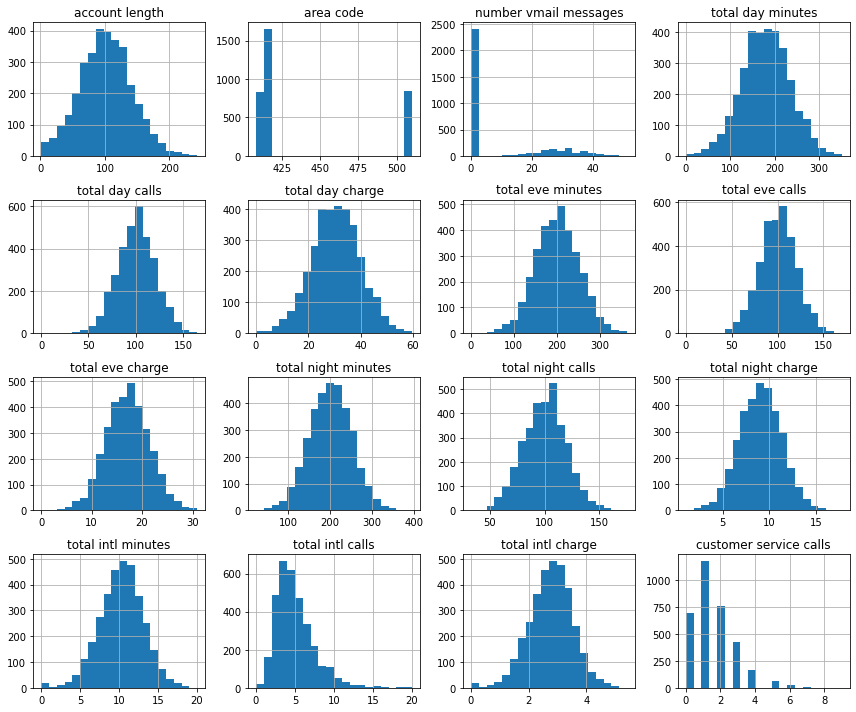

In [4]:
# Только числовые столбцы (исключая bool)
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Построение гистограмм
numeric_data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


### Построение гистограммы с использованием matplotlib

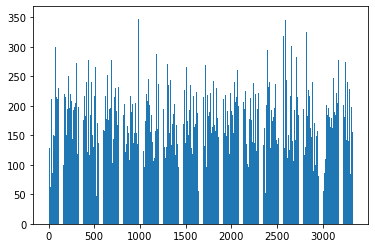

In [6]:
plt.bar(data.index, data['total day minutes'])
plt.show()


### Использование matplotlib для представления распределения значений признака

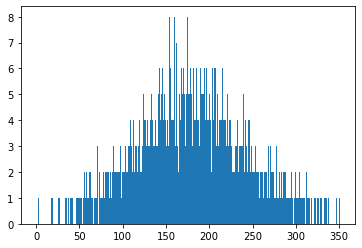

In [7]:
hist = data['total day minutes'].value_counts()
plt.bar(hist.index, hist);


### График «ящик с усами» для отдельного признака

/Users/ox/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


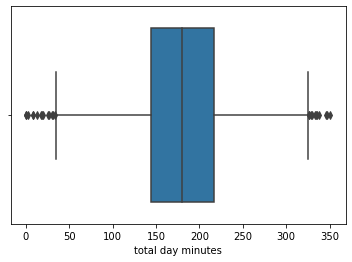

In [8]:
sns.boxplot(data['total day minutes']);


### Использование boxplot для анализа признака для пяти штатов

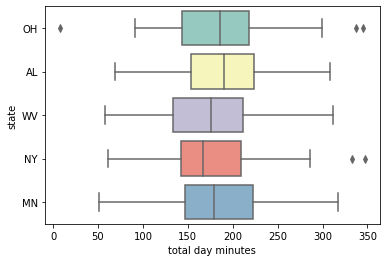

In [12]:
top_data = data[['state', 'total day minutes']]
top_data = top_data.groupby('state').sum()
top_data = top_data.sort_values('total day minutes', ascending=False)
top_data = top_data[:5].index.values

sns.boxplot(y='state',
            x='total day minutes',
            data=data[data.state.isin(top_data)], palette='Set3');


### Категориальные признаки

Типичным категориальным признаком в анализируемом наборе данных является «Штат» (State). Под категориальный признак подходит также «Отказ» (Churn) (хотя он является логическим).

/Users/ox/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

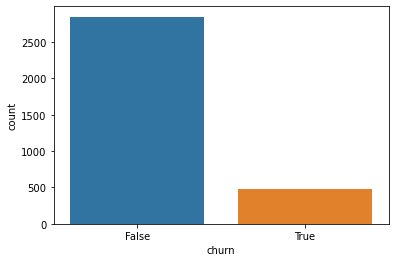

In [14]:
sns.countplot(data['churn'])

/Users/ox/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


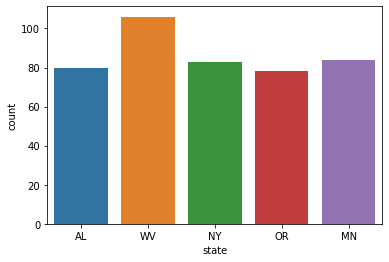

In [15]:
# гистограмма "популярных" штатов
sns.countplot(data[data['state'].isin(data['state'].value_counts().head(5).index)]['state']);


### Визуализация соотношения количественных признаков

Одним из вариантов визуализации соотношения количественных признаков является диаграмма по нескольким признакам. Рассмотрим пример, демонстрирующий сравнение распределений показателей, связанных с финансовыми затратами клиентов. Упрощенно, можно сказать, что это все показатели, содержащие подстроку «charge» в имени показателя. 

In [16]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'charge' in f]
feats


['total day charge',
 'total eve charge',
 'total night charge',
 'total intl charge']

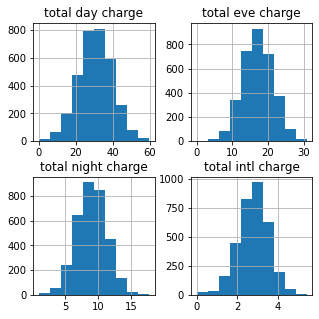

In [17]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5, 5));


### Попарное распределение признаков


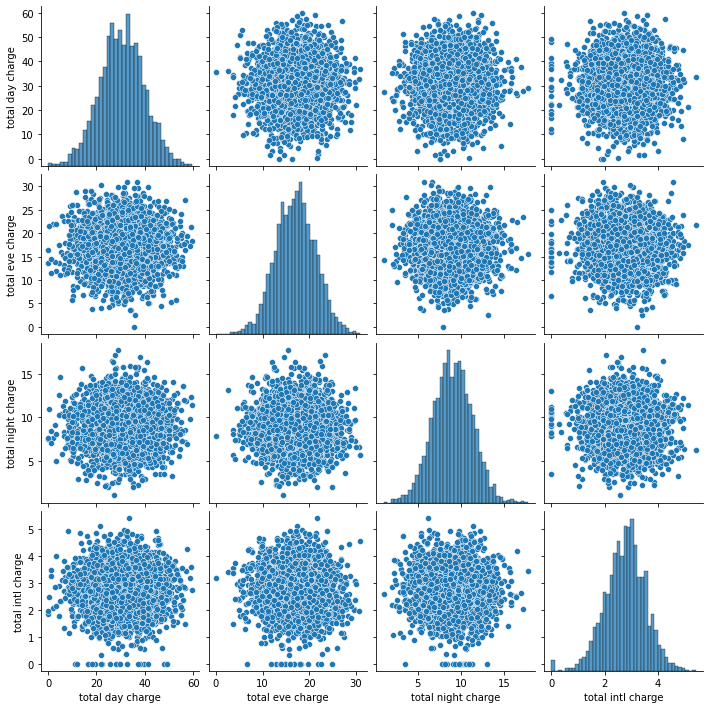

In [18]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);


### Попарное распределение признаков с визуализацией отказов


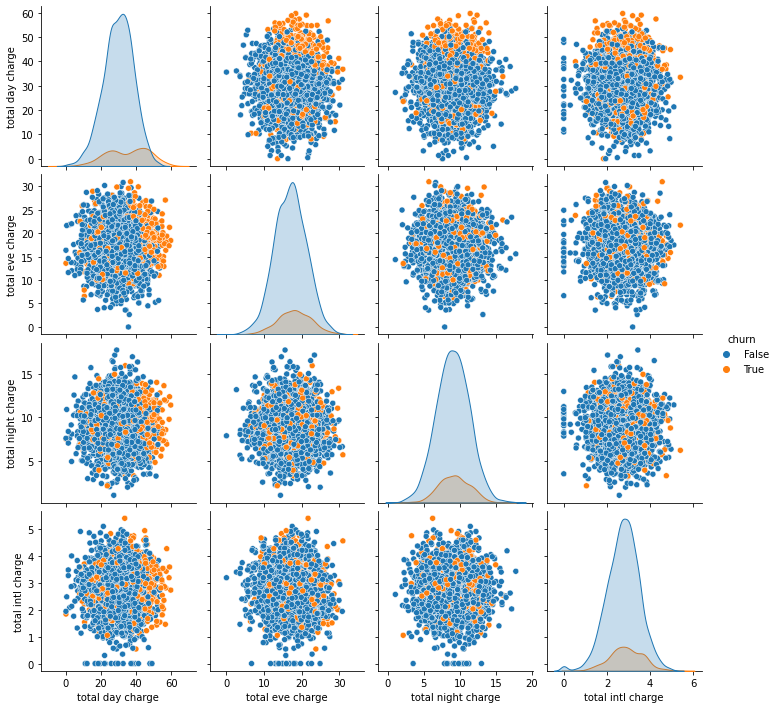

In [19]:
sns.pairplot(data[feats + ['churn']], hue='churn');


## График scatter библиотеки matplotlib, предназначенный для вывода множества точек.


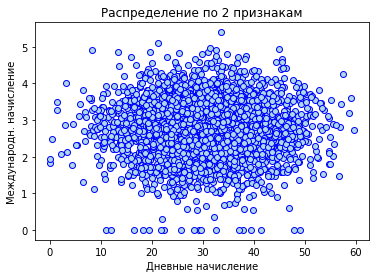

In [21]:
plt.scatter(data['total day charge'],
            data['total intl charge'],
            color='lightblue', edgecolors='blue')
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение по 2 признакам');


### Настройка графика: цвет точки зависит от целевого значения признака

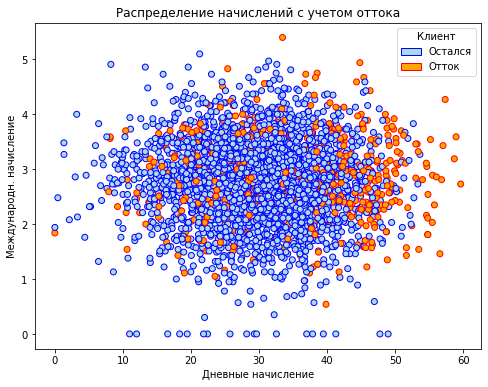

In [22]:
# Раскрашивание данных
# Цвет в зависимости от ухода клиента
c = data['churn'].map({False: 'lightblue', True: 'orange'})
edge_c = data['churn'].map({False: 'blue', True: 'red'})

# Настройка графика
plt.figure(figsize=(8, 6))
plt.scatter(data['total day charge'], data['total intl charge'],
            color=c, edgecolors=edge_c, label=None)

# Добавляем легенду вручную
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='blue', label='Остался'),
    Patch(facecolor='orange', edgecolor='red', label='Отток')
]
plt.legend(handles=legend_elements, title='Клиент')

# Подписи осей и заголовок
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение начислений с учетом оттока')
plt.show()


### Построение отдельных подмножеств с легендой

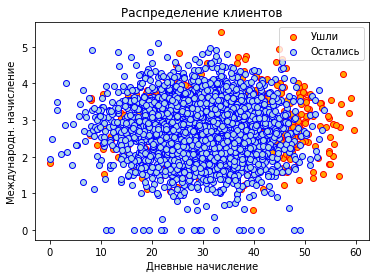

In [23]:
# Ушедшие клиенты
data_churn = data[data['churn']]
# Оставшиеся клиенты
data_loyal = data[~data['churn']]

plt.scatter(data_churn['total day charge'],
            data_churn['total intl charge'],
            color='orange',
            edgecolors='red',
            label='Ушли')

plt.scatter(data_loyal['total day charge'],
            data_loyal['total intl charge'],
            color='lightblue',
            edgecolors='blue',
            label='Остались')

plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение клиентов')
plt.legend();


### Определение коррелирующих признаков набора данных

В реальных задачах машинного обучения при первичном анализе данных необходимо выявить корреляции признаков обучающей выборки. В пакете Pandas имеется встроенный инструмент для этого — метод corr() класса DataFrame

In [24]:
data.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


### Визуализация матрицы корреляции с использованием графика типа heatmap

Полученная матрица имеет размер 17 × 17.
Это незначительный размер (в реальных задачах машинного обучения размеры матриц корреляции имеют
порядки 10⁶ – 10¹⁰ и более), но даже для матриц рассматриваемого набора данных проанализировать корреляцию признаков вручную — трудоемкая задача. Например, можно использовать скрипты, для выделения больших коэффициентов корреляции. Но лучше использовать специальный тип графика — heatmap.

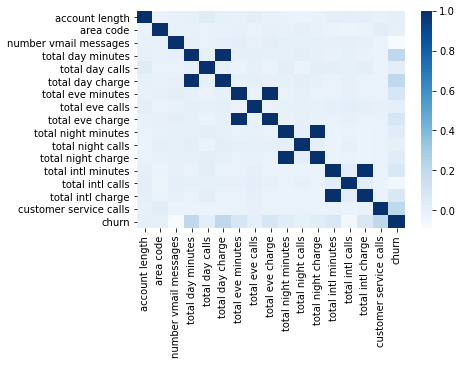

In [25]:
sns.heatmap(data.corr(), cmap=plt.cm.Blues);


#### Коррелирующие признаки обычно удаляются и не рассматриваются в процессе обучения.